In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [189]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/juancarlosvw/DATAMINING/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# rename the Annual Income (k$)	Spending Score (1-100) column


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [190]:
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [191]:
# describe data
df.describe()

,CustomerID,Age,Annual Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [192]:
# Check for null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income           200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


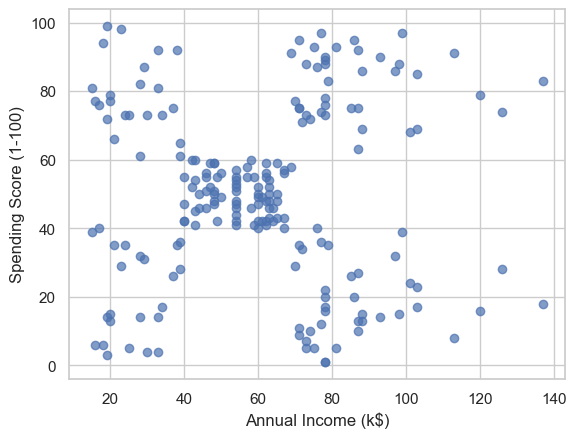

In [193]:
plt.scatter(df["Annual Income"], df["Spending Score (1-100)"], alpha=0.7)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

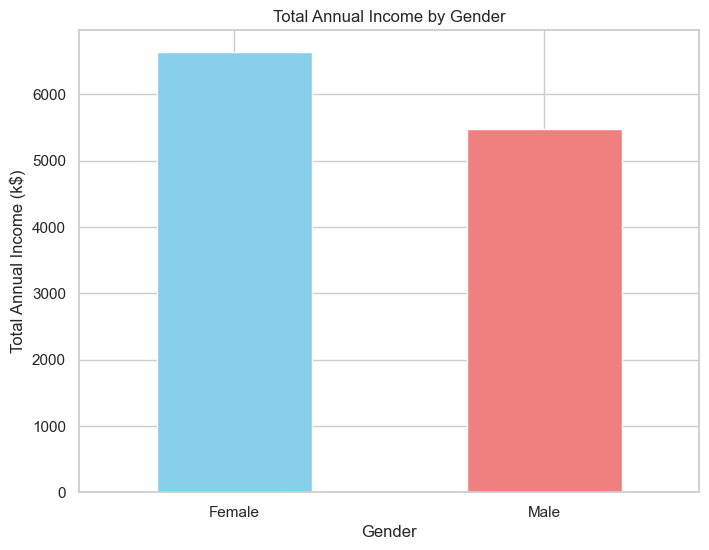

In [194]:
# make an insightful visualization and explain
gender_income = df.groupby('Gender')['Annual Income'].sum()
plt.figure(figsize=(8, 6))
gender_income.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Total Annual Income (k$)')
plt.title('Total Annual Income by Gender')
plt.xticks(rotation=0)
plt.show()

#To displays the total annual income for each gender

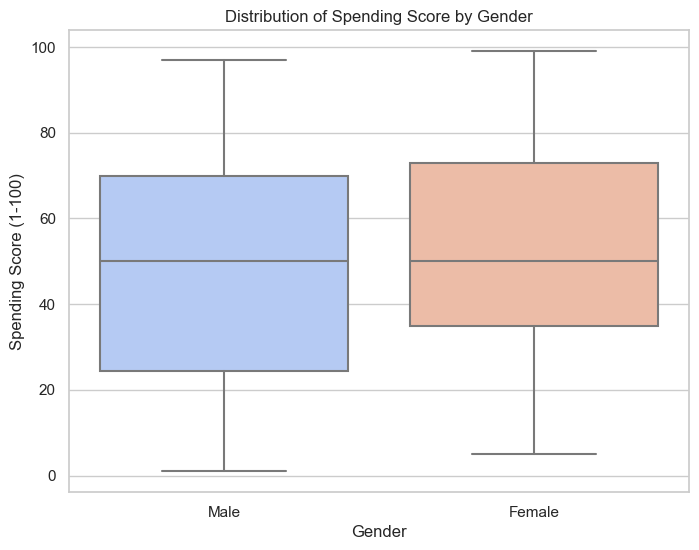

In [195]:
# make an insightful visualization and explain
sns.set(style="whitegrid")

# Plotting the box plot for Spending Score by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='coolwarm')
plt.title('Distribution of Spending Score by Gender')
plt.show()

#give a clear view of the spending score distribution, including the median, quartiles, and outliers for both genders.

## Data Preprocessing

For this case study, we only use income and spending score

In [ ]:
# create new dataframe that consist only annual income and spending score


,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [196]:
df_new = df[['Annual Income', 'Spending Score (1-100)']]
df_new.head()

,Annual Income,Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [197]:
df = df.iloc[:, -2:]
df.head()


,Annual Income,Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [ ]:
# scale dataset with standard scaler



,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [198]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=["Annual Income", "Spending Score (1-100"])
df.head()

,Annual Income,Spending Score (1-100
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
# get stastical information on the new dataset


,income,spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


In [199]:
df.describe()

,Annual Income,Spending Score (1-100
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

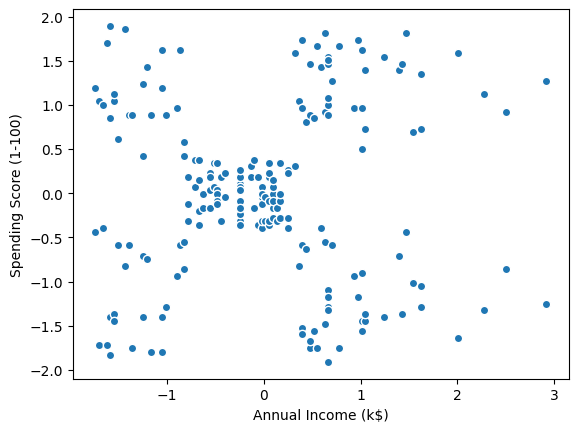

In [ ]:
# Visualize the position


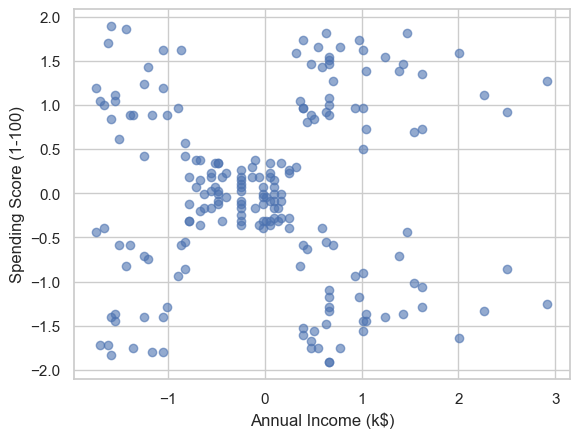

In [201]:
import matplotlib.pyplot as plt

plt.scatter(df["Annual Income"], df["Spending Score (1-100"], alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

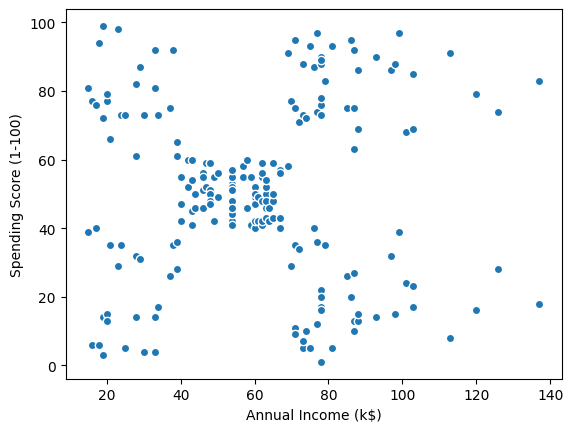

In [ ]:
# Visualize the position using the original scale


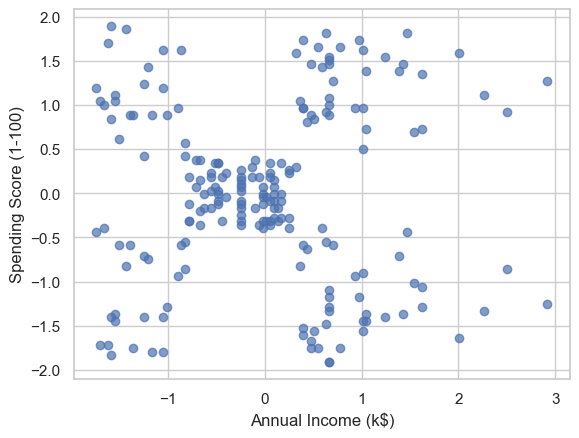

In [202]:
plt.scatter(df["Annual Income"], df["Spending Score (1-100"], alpha=0.7)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [203]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

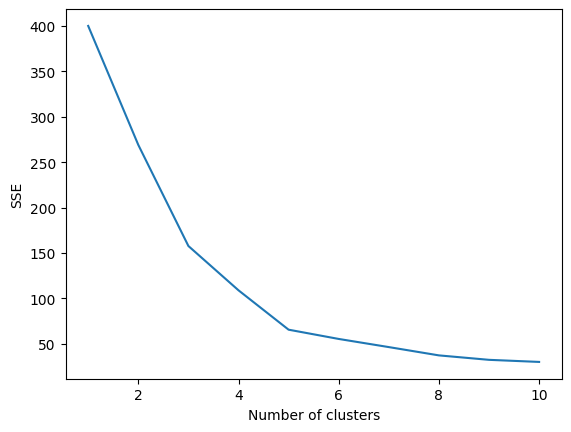

In [ ]:
# manually visualize the elbow method using plotlib


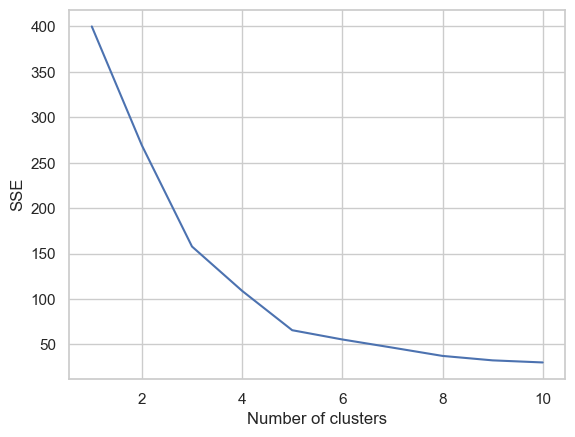

In [204]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# using kneelocator to find the elbow/knee


The best k for you model is 5


In [205]:
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [ ]:
# assign cluster with K-Means algorithm


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [206]:
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Visualize your result based on income and spending. You also can show the final position of the centroid.

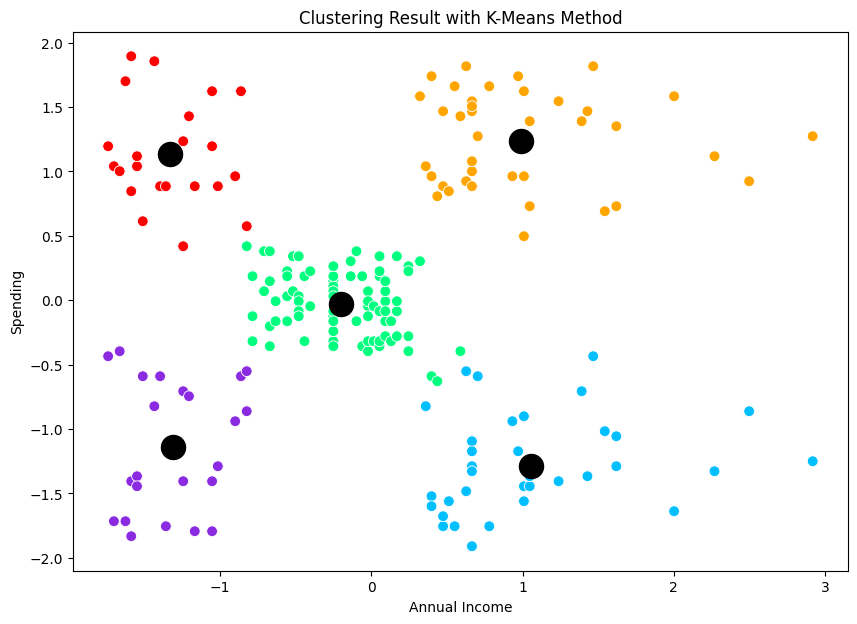

In [ ]:
# visualize the result using scater chart


C:\Users\M.S.I\AppData\Local\Temp\ipykernel_23776\2843031565.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Annual Income", y = "Spending Score (1-100", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)


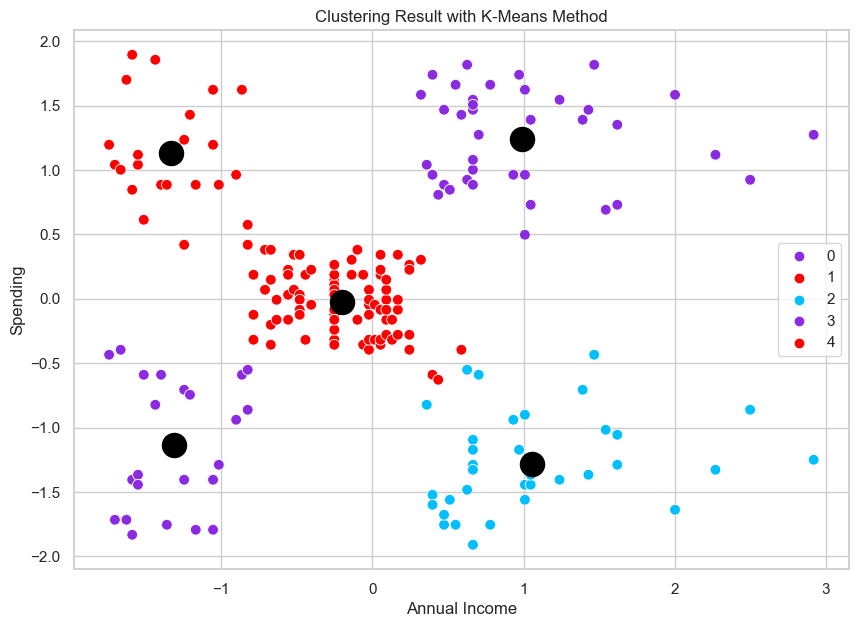

In [208]:
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Annual Income", y = "Spending Score (1-100", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [209]:
from sklearn.preprocessing import StandardScaler
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(scaler.inverse_transform(df), columns=["Annual Income", "Spending Score (1-100"])

# Add the cluster labels to the original data
df['Cluster'] = y_pred

# analyze the clusters with the original values
df.head()

,Annual Income,Spending Score (1-100,Cluster
0,-197.157902,-41.610545,0
1,-197.157902,118.178999,1
2,-192.501231,-167.159472,0
3,-192.501231,102.960947,1
4,-187.844561,-37.806032,0


In [ ]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster


SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

In [211]:
cluster_summary = df.groupby(y_pred).agg({'Spending Score (1-100': ['mean', 'std', 'min', 'max'],
                                              'Annual Income': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Spending Score (1-100                                     \
                         mean        std         min         max   
cluster                                                            
0                 -110.422605  49.523981 -178.573011  -37.806032   
1                  111.953432  39.963264   42.088740  186.660232   
2                 -124.875028  37.863100 -186.182037  -41.610545   
3                  122.471270  35.627320   49.697766  179.051206   
4                   -1.592705  24.846929  -60.633110   42.088740   

        Annual Income                                     
                 mean        std         min         max  
cluster                                                   
0         -144.517280  36.758876 -197.157902  -85.397813  
1         -147.204529  35.235770 -197.157902  -85.397813  
2          143.710369  76.365051   58.958968  370.955882  
3          135.973132  75.961865   54.302298  370.955882  
4           -9.511333  41.854663  -85.397813   86.898990

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

Implikasi: Ada 5 cluster yang dibentuk

Cluster 0: orang yang memiliki spending -178 - -37 dan mempunyai income -197 - -85
Cluster 1: orang yang memiliki spending 42-186 dan mempunyai income -197 - -85
CLuster 2: orang yang memiliki spending -186 - -41 dan mempunyai income 58-370
CLuster 3: orang yang memiliki spending 49-179 dan mempunyai income 54-370
CLuster 4: orang yang memiliki spending -60 - 42 dan mempunyai income -85 - 86

Suggestions for Company :

Target Cluster 3 for high-end products and services.
Target Cluster 1 for specific products that they might be interested in.
Target Cluster 0 for discounts and loyalty program
Target Cluster 2 for exclusive high-end products
Target Cluster 4 for giving bundles and loyalty programs

<write here>